## Imports

In [44]:
# basic imports
import os 
import glob

# sci python and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# model selection and performance
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,chi2

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# decorations
from IPython.display import YouTubeVideo

import warnings
warnings.filterwarnings('ignore')

np.random.seed(2)

In [3]:
glob.glob('*')

['6_MLexplore.ipynb',
 '1_Pure_Truncation_Start_Bal_Ella_Version2-editedJulia.ipynb',
 '3_individual_outcome_determination.ipynb',
 'loan_outcomes_33_150.csv',
 'individual_outcomes_33_150.csv',
 'data.csv',
 '4_merge_predictors_with_outcome.ipynb',
 '2_loan_outcome_determination.ipynb',
 'diaries_trx_trunc_loans_start_bal.csv',
 'binary_y_train.csv',
 'Pure_Truncation_Start_Bal_Ella_Version2.ipynb',
 'binary_x_train.csv',
 'binary_x_test.csv',
 'binary_y_test.csv',
 '5_train_test_split.ipynb']

In [27]:
x_train = pd.read_csv('binary_x_train.csv')
x_test  = pd.read_csv('binary_x_test.csv')
y_train = pd.read_csv('binary_y_train.csv')
y_test  = pd.read_csv('binary_y_test.csv')

In [28]:
x_train = x_train.drop(['owner_score'], axis = 1)
x_test  = x_test.drop(['owner_score'], axis = 1)

In [29]:
y_train.columns = ['outcome']
y_test.columns = ['outcome']

In [50]:
x_train.dem_i_relhead.value_counts()

Household head               61
Husband or wife              27
Son or daughter               2
Parent (mother or father)     1
Name: dem_i_relhead, dtype: int64

In [65]:
x_train.dem_i_marstat.value_counts()

Married/living together         67
Widowed                         10
Separated/divorced               8
Never married/lived together     6
Name: dem_i_marstat, dtype: int64

## Associations: 

In [30]:
associations = pd.concat([x_train,y_train], axis=1)

In [31]:
associations.outcome.value_counts(normalize=True)

1.0    0.788889
0.0    0.211111
Name: outcome, dtype: float64

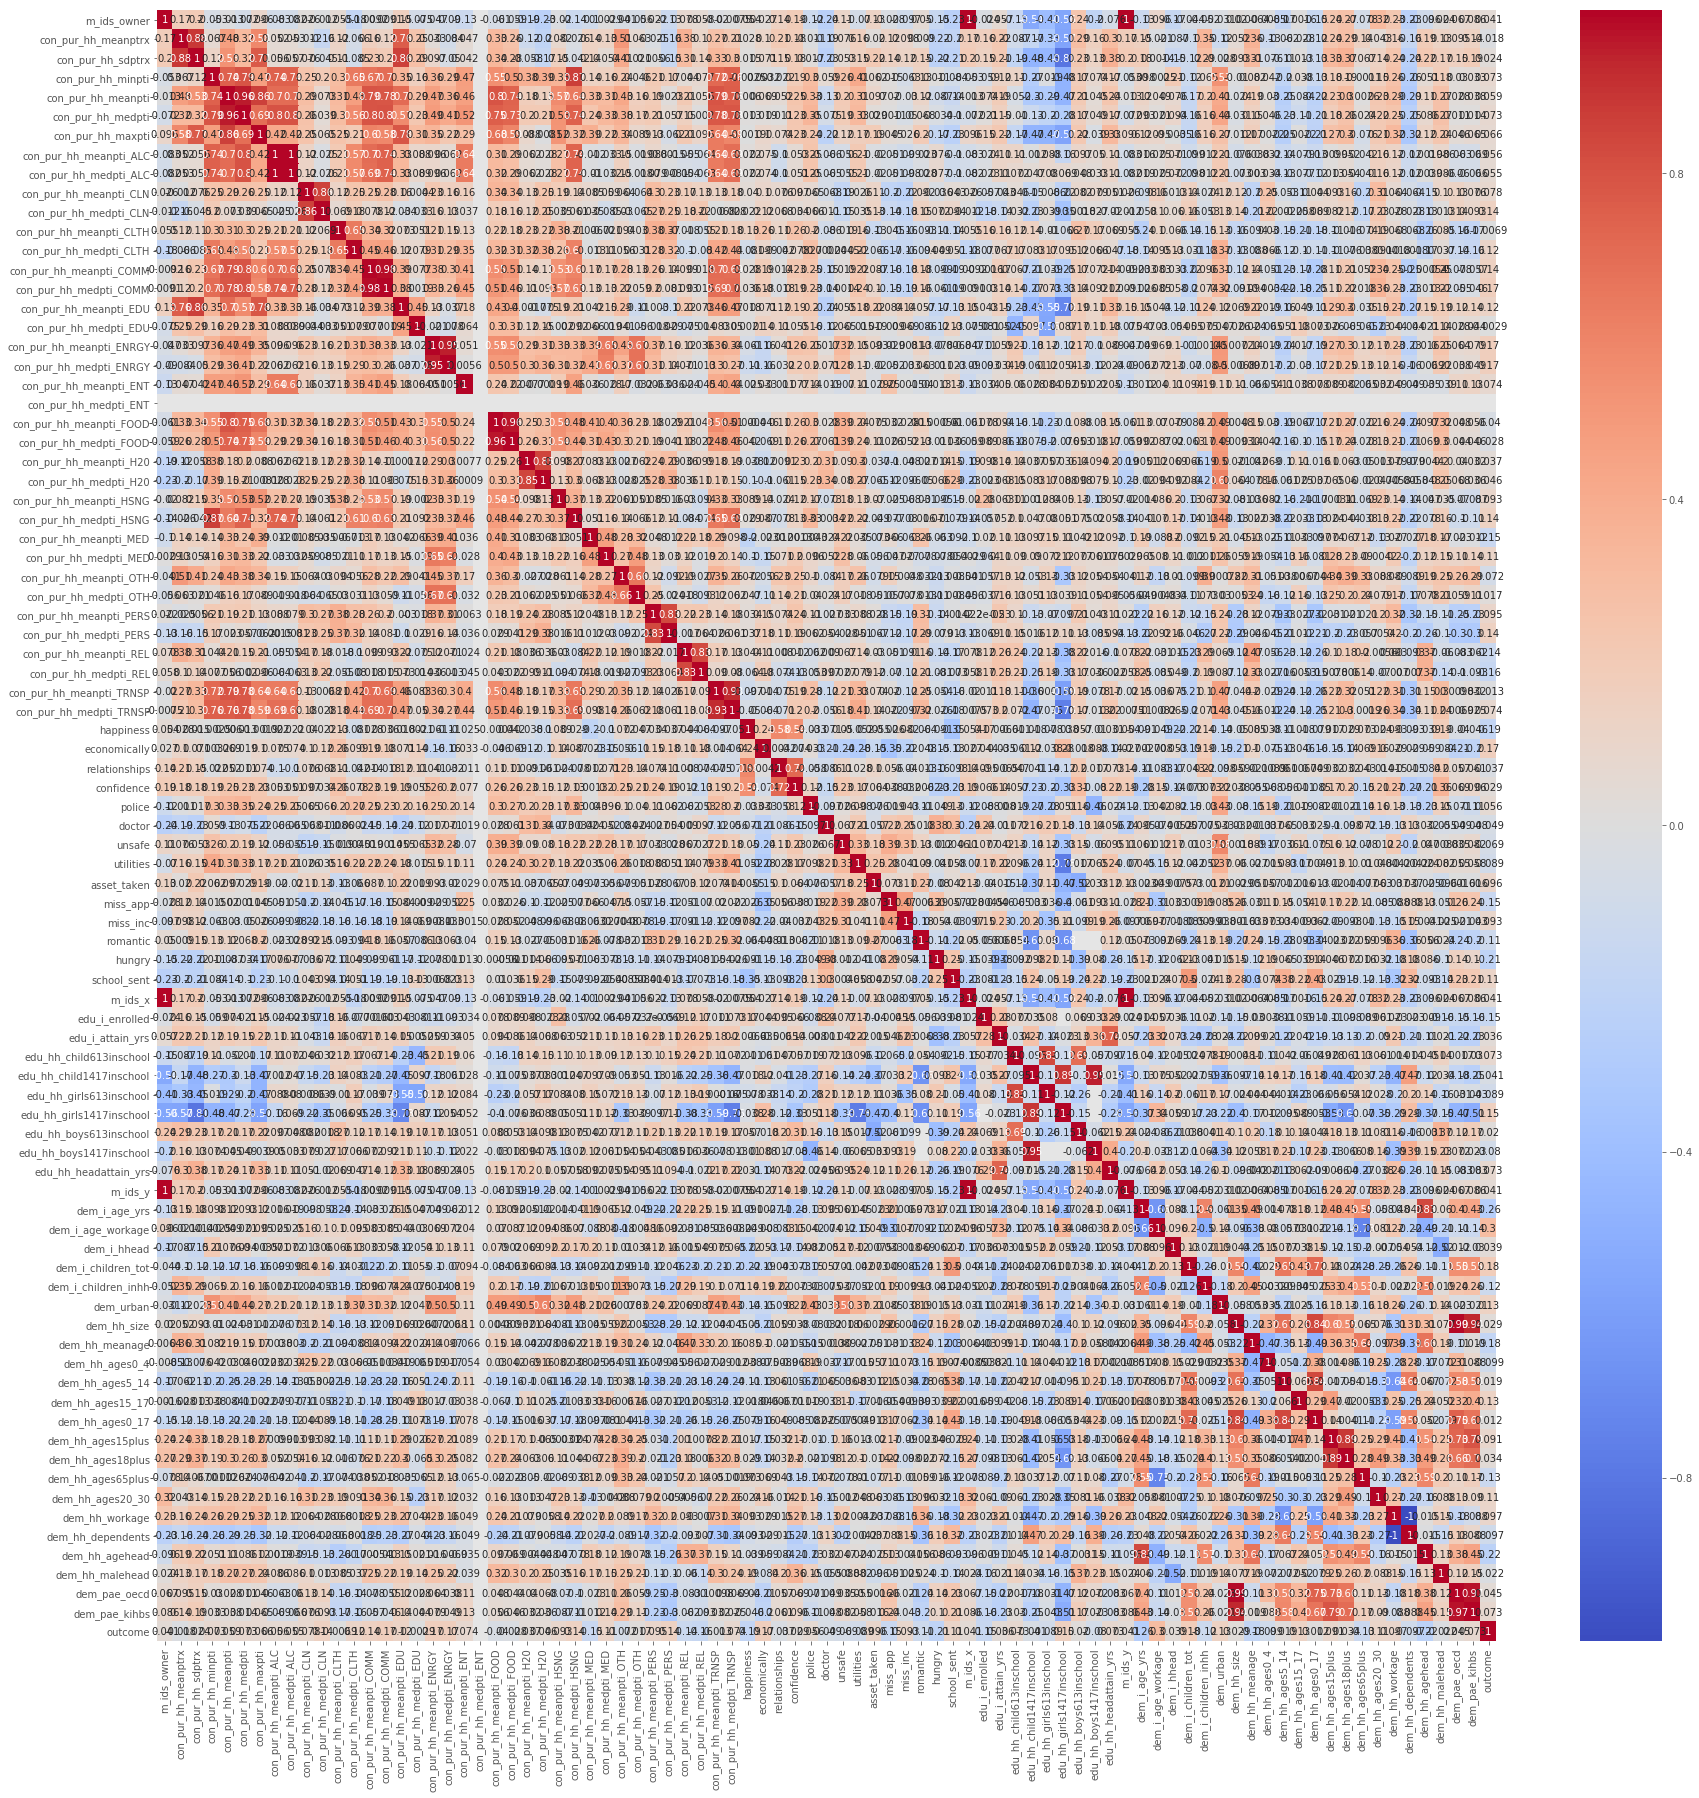

In [32]:
corr = associations[associations.columns].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot = True, cmap='coolwarm')

## It appears that there is a lot of correlation among a few features; this makes sense b/c some are mean, some are median measures of the same thing. Let's only keep one of those for now & redo the correlation plot: 

In [33]:
med_cols = [col for col in x_train.columns if 'med' in col]
med_cols

['con_pur_hh_medpti',
 'con_pur_hh_medpti_ALC',
 'con_pur_hh_medpti_CLN',
 'con_pur_hh_medpti_CLTH',
 'con_pur_hh_medpti_COMM',
 'con_pur_hh_medpti_EDU',
 'con_pur_hh_medpti_ENRGY',
 'con_pur_hh_medpti_ENT',
 'con_pur_hh_medpti_FOOD',
 'con_pur_hh_medpti_H20',
 'con_pur_hh_medpti_HSNG',
 'con_pur_hh_medpti_MED',
 'con_pur_hh_medpti_OTH',
 'con_pur_hh_medpti_PERS',
 'con_pur_hh_medpti_REL',
 'con_pur_hh_medpti_TRNSP']

In [34]:
x_train = x_train.drop(med_cols, axis = 1)
x_test  = x_test.drop(med_cols, axis = 1)

In [35]:
associations = pd.concat([x_train,y_train], axis=1)

In [36]:
associations.outcome.value_counts(normalize=True)

1.0    0.788889
0.0    0.211111
Name: outcome, dtype: float64

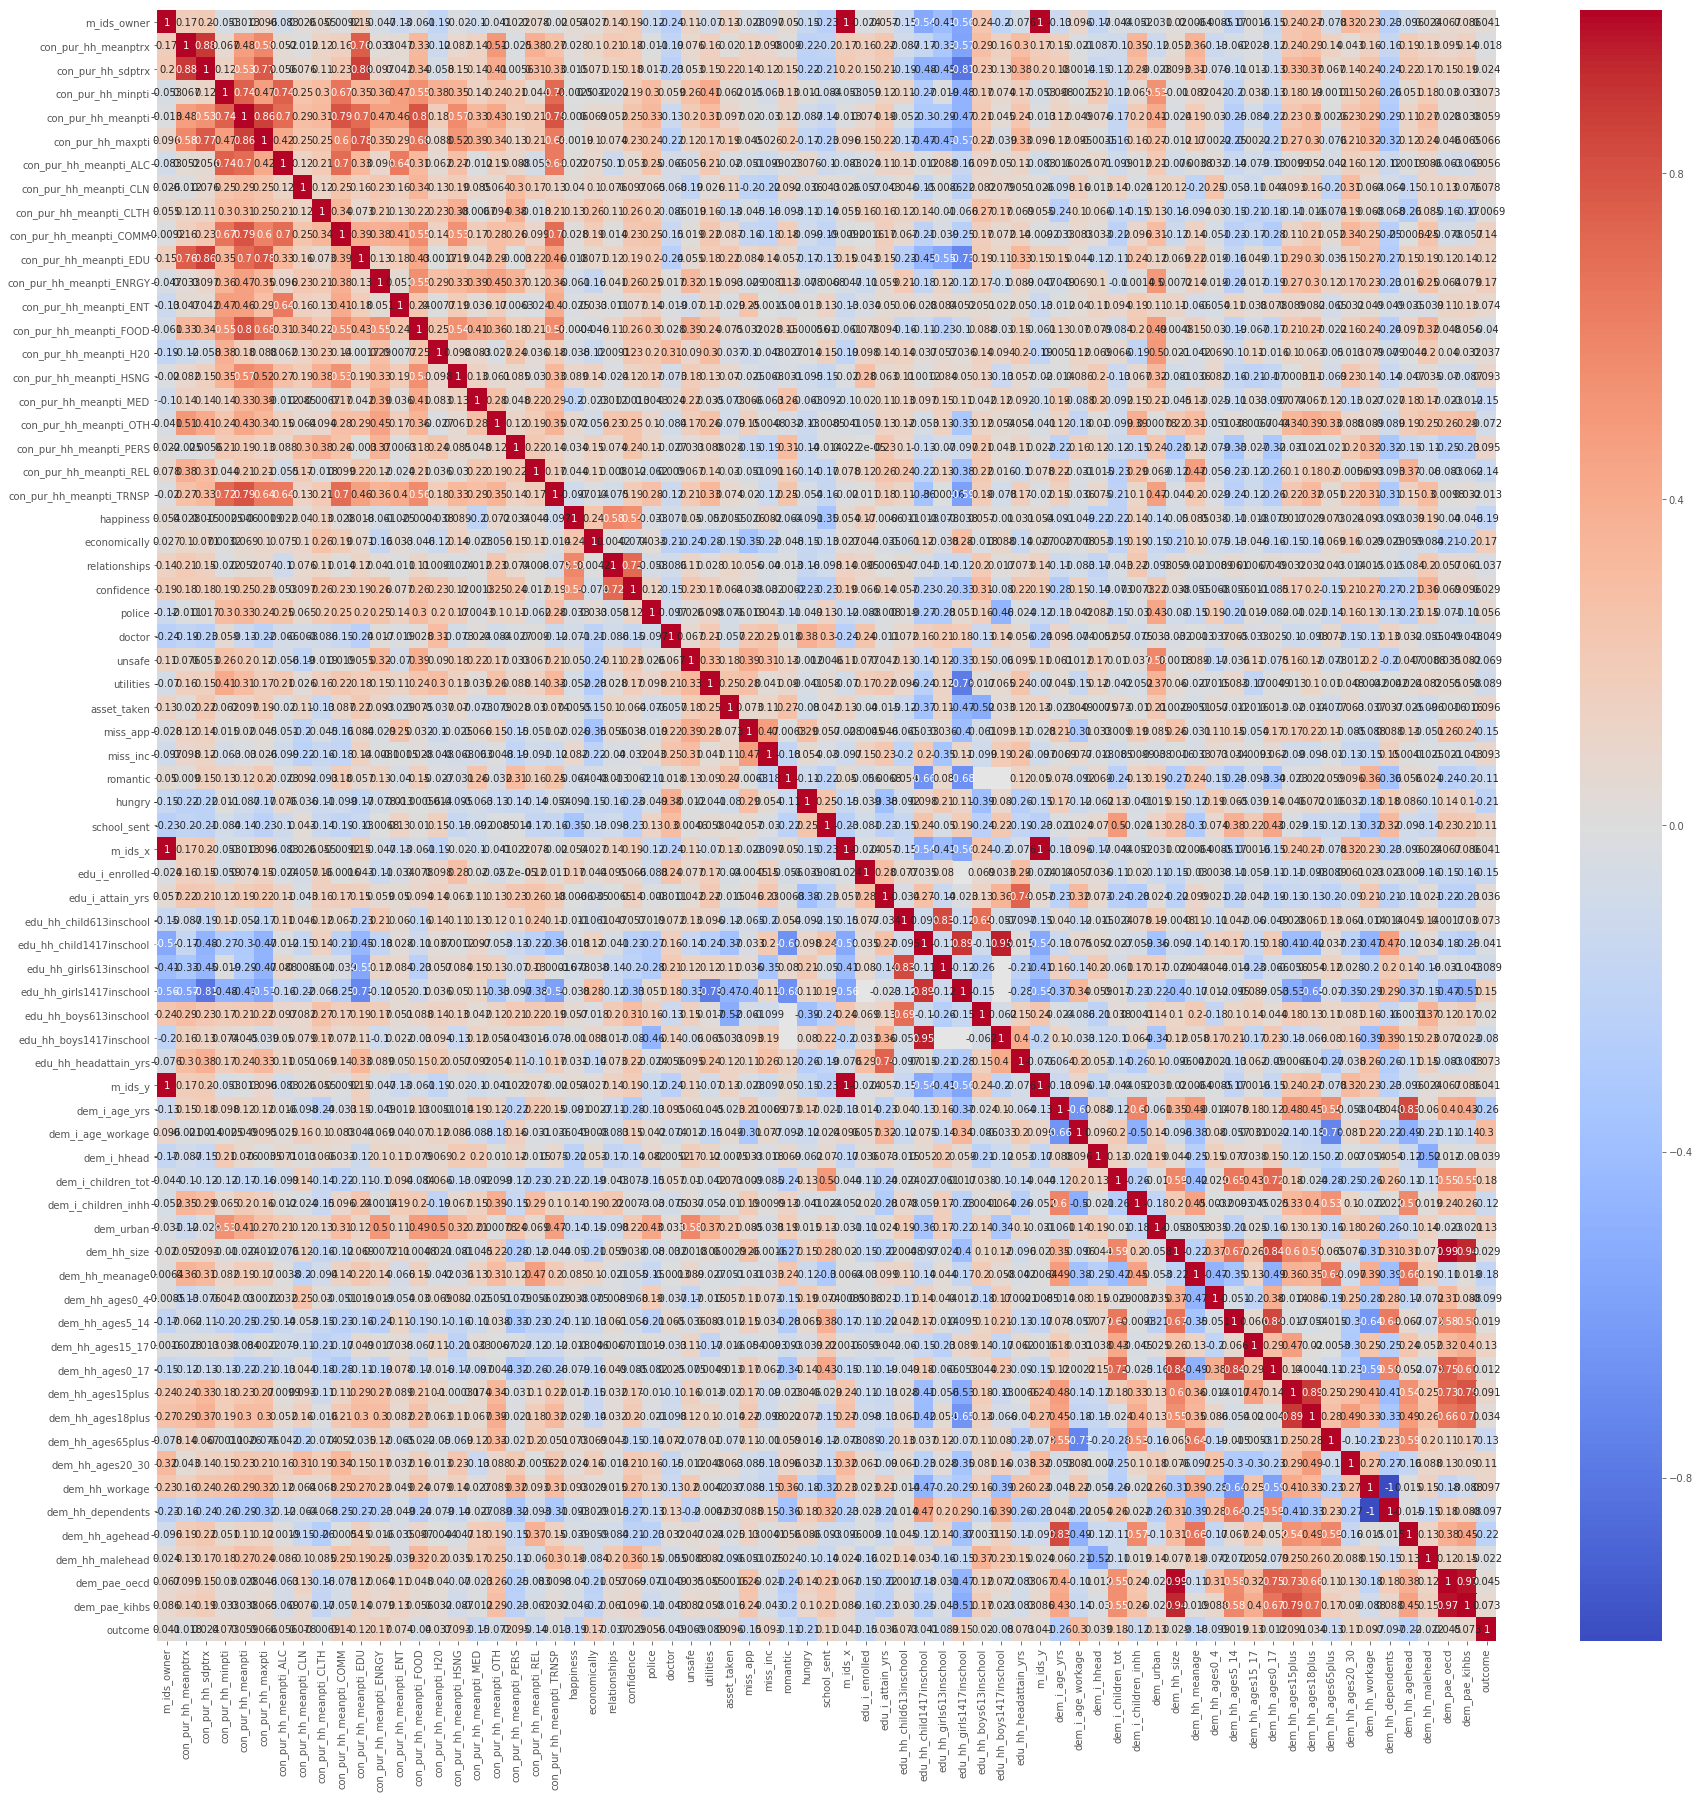

In [37]:
corr = associations[associations.columns].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot = True, cmap='coolwarm')

## Feature selection: 

We may not have to do this, but let's see what pops out: 

In [38]:
x_train.shape

(91, 75)

In [42]:
x_train.dtypes[x_train.dtypes=='object']

hh_ids              object
edu_i_attain        object
dem_i_male          object
dem_i_age_5yrgrp    object
dem_i_relhead       object
dem_i_marstat       object
dem_i_tribe         object
dtype: object

In [43]:
x_train.edu_i_attain

0     Post-secondary (some or complete)
1            Primary (some or complete)
2            Primary (some or complete)
3            Primary (some or complete)
4            Primary (some or complete)
5          Secondary (some or complete)
6            Primary (some or complete)
7            Primary (some or complete)
8            Primary (some or complete)
9            Primary (some or complete)
10         Secondary (some or complete)
11         Secondary (some or complete)
12           Primary (some or complete)
13         Secondary (some or complete)
14         Secondary (some or complete)
15           Primary (some or complete)
16           Primary (some or complete)
17         Secondary (some or complete)
18           Primary (some or complete)
19           Primary (some or complete)
20    Post-secondary (some or complete)
21         Secondary (some or complete)
22           Primary (some or complete)
23           Primary (some or complete)
24         Secondary (some or complete)


In [39]:
select_top_20 = SelectKBest(score_func=chi2, k = 20)
fit = select_top_20.fit(x_train,y_train)
features_20 = fit.transform(x_train)


ValueError: could not convert string to float: 'Kalenjin'